<a href="https://colab.research.google.com/github/dev-S-t/Fraud_Detection/blob/main/Clutch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gc

> # **DATA INFO**

#### The data is broken into **two files identity and transaction,** which are **joined by TransactionID**. Not all transactions have corresponding identity information.
https://www.kaggle.com/c/ieee-fraud-detection/data?select=test_transaction.csv




>> ### **Categorical Features - Transaction**



>>>* ProductCD
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9


>> ### **Categorical Features - Identity**


>>> * DeviceType
* DeviceInfo
* id_12 - id_38



> ### **Transaction Table**

>> * TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
* TransactionAMT: transaction payment amount in USD
* ProductCD: product code, the product for each transaction
* card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.         
`(card4 = card issuer name and card6 = debit or credit)`
* addr: address
* dist: distance
* P_ and (R__) emaildomain: purchaser and recipient email domain
* C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
* D1-D15: timedelta, such as days between previous transaction, etc.
* M1-M9: match, such as names on card and address, etc.
* Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.


> ### **Identity Table**


>> * Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
* They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)



> # Loading Data

In [38]:
# sample_df = pd.read_csv("/content/drive/MyDrive/ieee-fraud-detection/sample_submission.csv")
# test_id = pd.read_csv("/content/drive/MyDrive/ieee-fraud-detection/test_identity.csv")
# test_transaction = pd.read_csv("/content/drive/MyDrive/ieee-fraud-detection/test_transaction.csv")
train_id = pd.read_csv("/content/drive/MyDrive/ieee-fraud-detection/train_identity.csv")
train_transaction = pd.read_csv("/content/drive/MyDrive/ieee-fraud-detection/train_transaction.csv")

In [39]:
# Merge datasets
train = train_transaction.merge(train_id, on='TransactionID', how='left')

In [40]:
del train_id
del train_transaction

In [41]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [42]:
## Memory Reducer from kaggel
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [43]:
train= reduce_mem_usage(train)

Mem. usage decreased to 645.97 Mb (67.0% reduction)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float16(354), float32(45), int16(1), int32(2), int8(1), object(31)
memory usage: 646.0+ MB


In [44]:
train.sort_values(by='TransactionDT' , inplace=True)
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


# Missing

In [ ]:
threshold = 50
cols_to_drop = missing_df[missing_df['missing_percentage'] > threshold]['column_name']
train.drop(cols_to_drop, axis=1, inplace=True)


In [ ]:
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({'column_name': train.columns, 'missing_percentage': missing_percentage})
missing_df.sort_values(by='missing_percentage', ascending=False, inplace=True)
missing_df.head()

,column_name,missing_percentage
id_24,id_24,99.196159
id_25,id_25,99.130965
id_07,id_07,99.127070
id_08,id_08,99.127070
id_21,id_21,99.126393


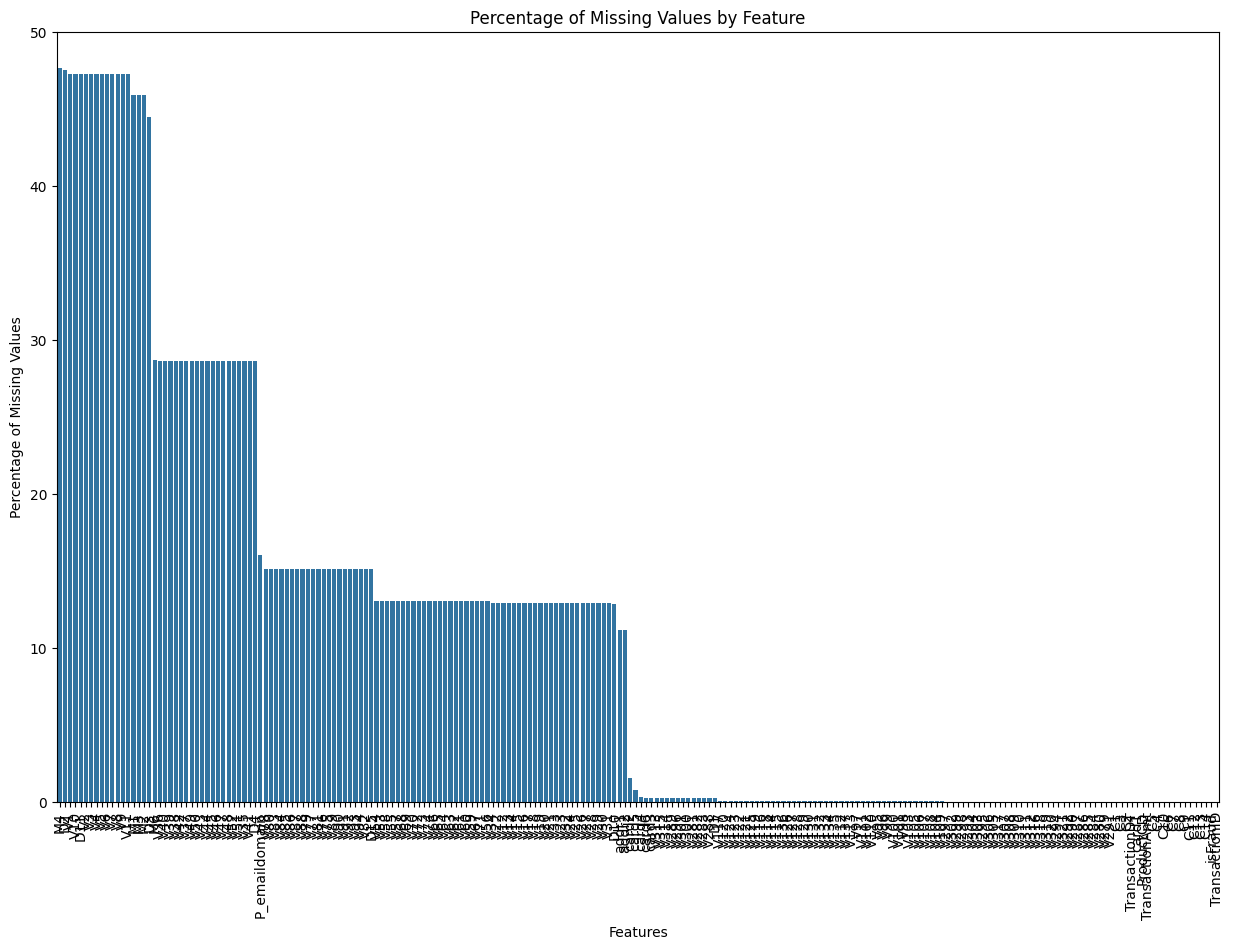

In [ ]:


plt.figure(figsize=(15, 10))
sns.barplot(x=missing_df['column_name'], y=missing_df['missing_percentage'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Feature')
plt.show()


In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 1)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df , end="\n")
    if na_name:
        return na_columns

missing_values_table(test_df, na_name=False)

In [ ]:
import pandas as pd

# Calculate missing values
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100

# Create a DataFrame for missing values
missing_df = pd.DataFrame({'column_name': train.columns, 'missing_percentage': missing_percentage})
missing_df.sort_values(by='missing_percentage', ascending=False, inplace=True)

# Display columns with their missing percentage
print(missing_df)


                 column_name  missing_percentage
M4                        M4           47.658753
D2                        D2           47.549192
V1                        V1           47.293494
V10                      V10           47.293494
D11                      D11           47.293494
...                      ...                 ...
C12                      C12            0.000000
C13                      C13            0.000000
C14                      C14            0.000000
isFraud              isFraud            0.000000
TransactionID  TransactionID            0.000000

[220 rows x 2 columns]


# Visuals

Ratio of fraudulent cases: 0.03499000914417313
Ratio of non-fraudulent cases: 0.9650099908558268


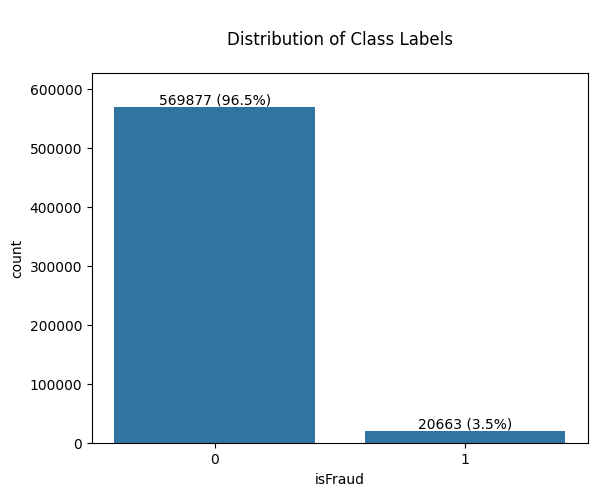

In [45]:
# Count the occurrences of fraud and no fraud
occ = train['isFraud'].value_counts()


ratio_cases = occ/len(train.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')
###

ax = sns.countplot(x='isFraud', data = train)

plt.title("\nDistribution of Class Labels\n")

plt.margins(0.05, 0.1)

for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{} ({:.1f}%)'.format(int(y),100.*y/len(train)), (x.mean(), y),
          ha='center', va='bottom')

plt.show()

In [46]:
del occ

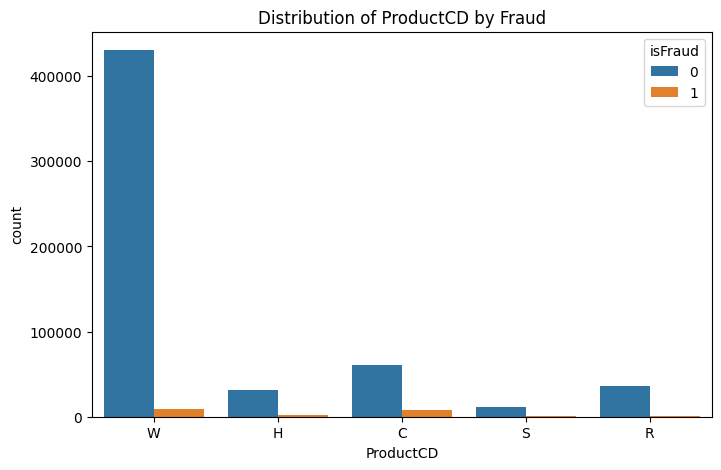

In [ ]:
# Visualize the distribution of 'ProductCD'
plt.figure(figsize=(8, 5))
sns.countplot(x='ProductCD', hue='isFraud', data=train)
plt.title('Distribution of ProductCD by Fraud')
plt.show()

In [47]:
# Assuming the reference date for TransactionDT is 2017-11-30
# Convert TransactionDT to datetime
reference_date = pd.to_datetime('2017-11-30')
train['TransactionDate'] = reference_date + pd.to_timedelta(train['TransactionDT'], unit='s')
# Group by date and isFraud
fraud_trends = train.groupby([train['TransactionDate'].dt.date, 'isFraud']).size().unstack(fill_value=0)


<ipython-input-47-1e78c33881c1>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['TransactionDate'] = reference_date + pd.to_timedelta(train['TransactionDT'], unit='s')


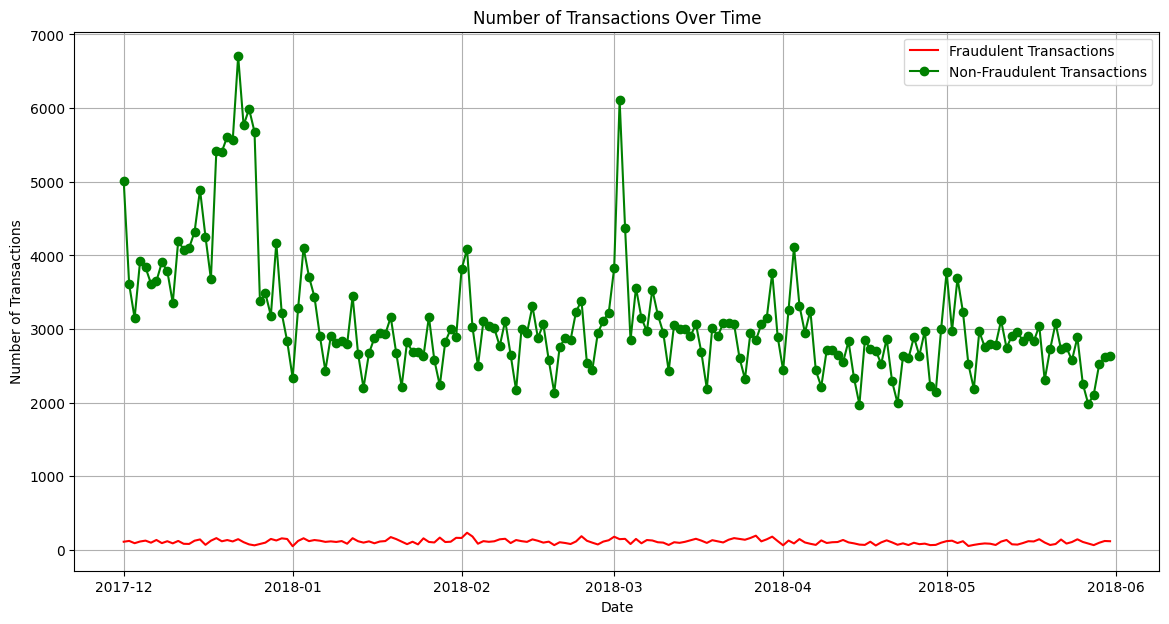

In [48]:
# Plotting the data
plt.figure(figsize=(14, 7))

plt.plot(fraud_trends.index, fraud_trends[1], label='Fraudulent Transactions', color='red')
plt.plot(fraud_trends.index, fraud_trends[0], label='Non-Fraudulent Transactions', color='green',marker='o')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.legend()
plt.grid(True)
plt.show()

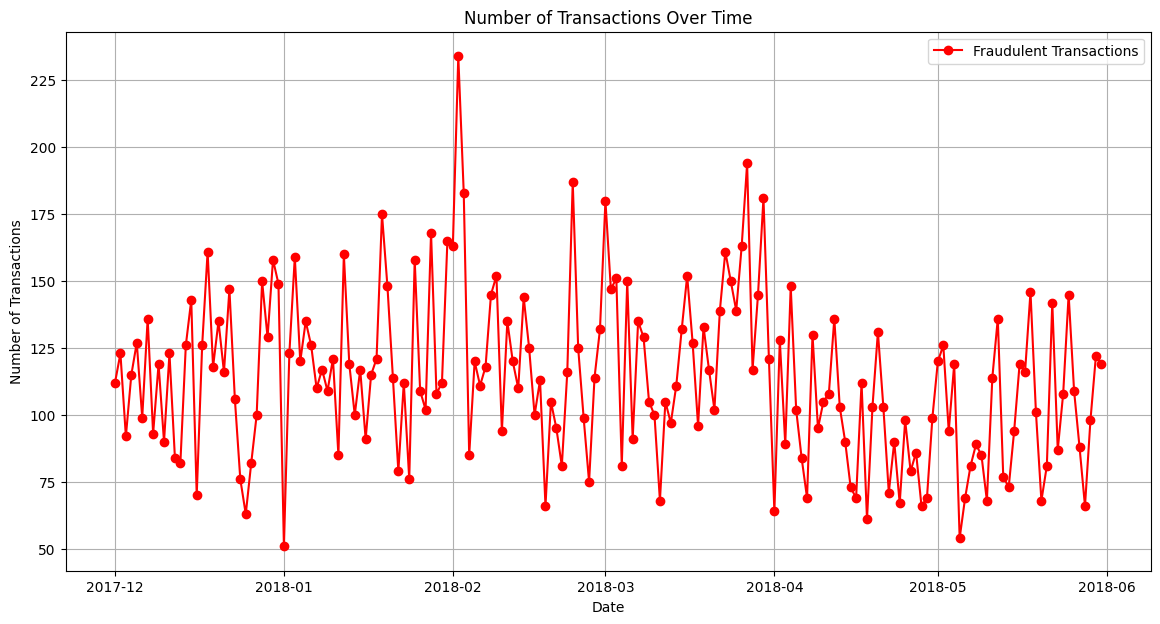

In [49]:
# Plotting the data
plt.figure(figsize=(14, 7))

plt.plot(fraud_trends.index, fraud_trends[1], label='Fraudulent Transactions', color='red', marker ='o')
# plt.plot(fraud_trends.index, fraud_trends[0], label='Non-Fraudulent Transactions', color='green')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.legend()
plt.grid(True)
plt.show()

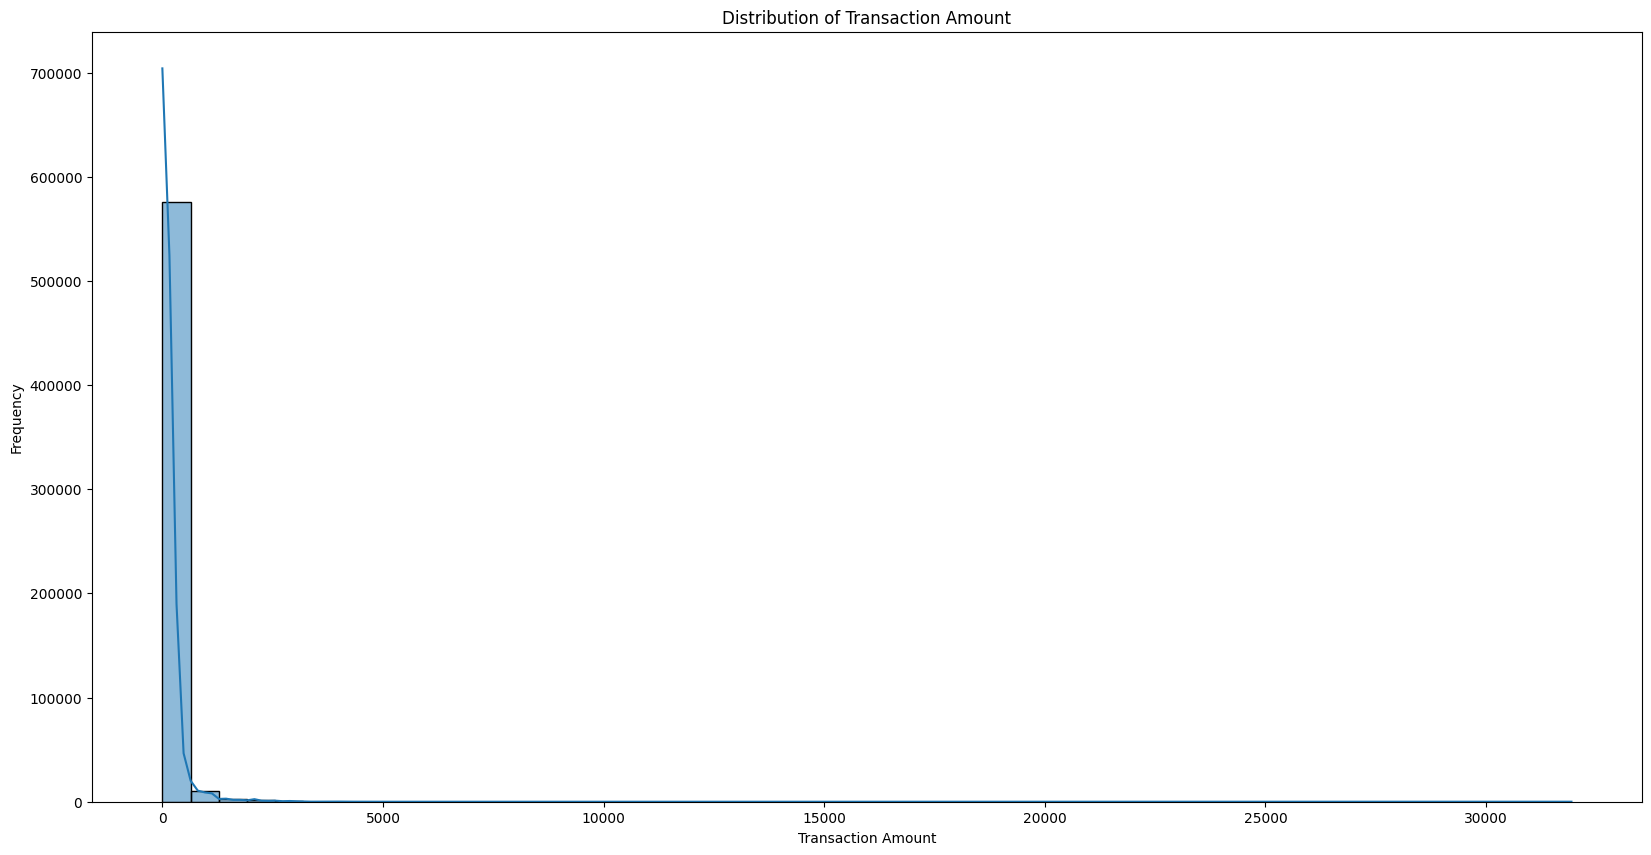

In [50]:
# Visualize the distribution of 'TransactionAmt'
plt.figure(figsize=(20, 10))
sns.histplot(train['TransactionAmt'], bins=50, kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()

In [51]:
gc.collect()

17003

# Feature Engen. and preprocessing

In [56]:
train['Data_Available'] = (train.notnull().sum(axis=1)/434) * 100

In [57]:
train['Data_Available'].describe()

count    590540.000000
mean         55.386458
std          11.298609
min          22.119816
25%          47.695853
50%          51.843318
75%          52.534562
max          94.930876
Name: Data_Available, dtype: float64

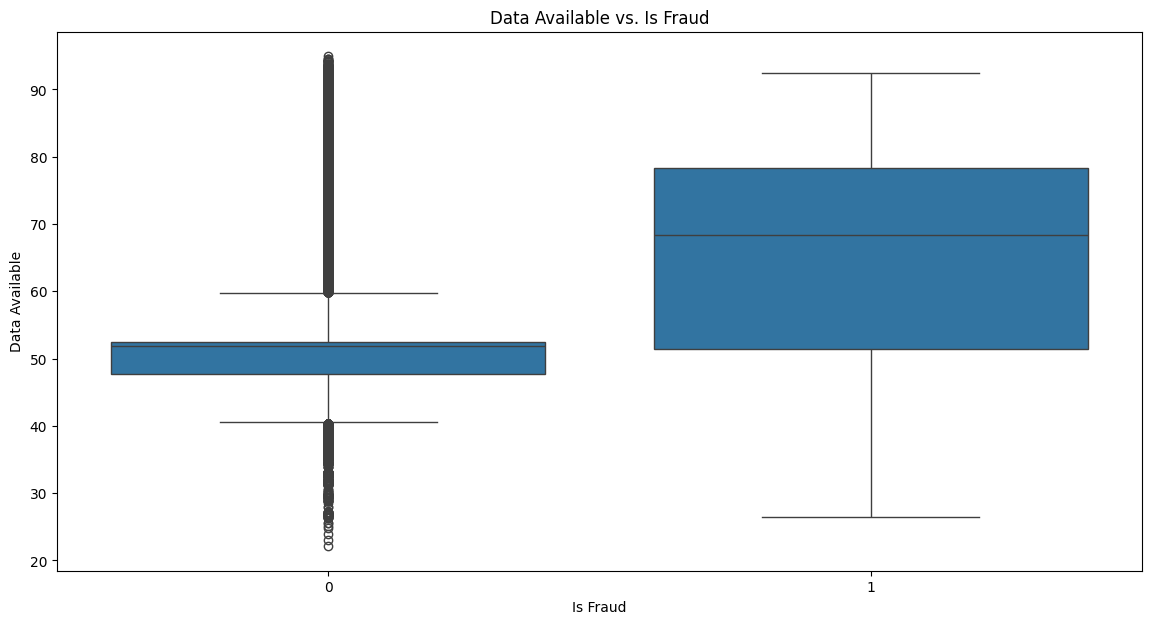

In [63]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='isFraud', y='Data_Available', data=train)
plt.xlabel('Is Fraud')
plt.ylabel('Data Available')
plt.title('Data Available vs. Is Fraud')
plt.show()

<ipython-input-64-3fb6eabe5f18>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['isFraud'] == 1]['Data_Available'], shade=True, color='red', label='Fraudulent')
<ipython-input-64-3fb6eabe5f18>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['isFraud'] == 0]['Data_Available'], shade=True, color='green', label='Non-Fraudulent')


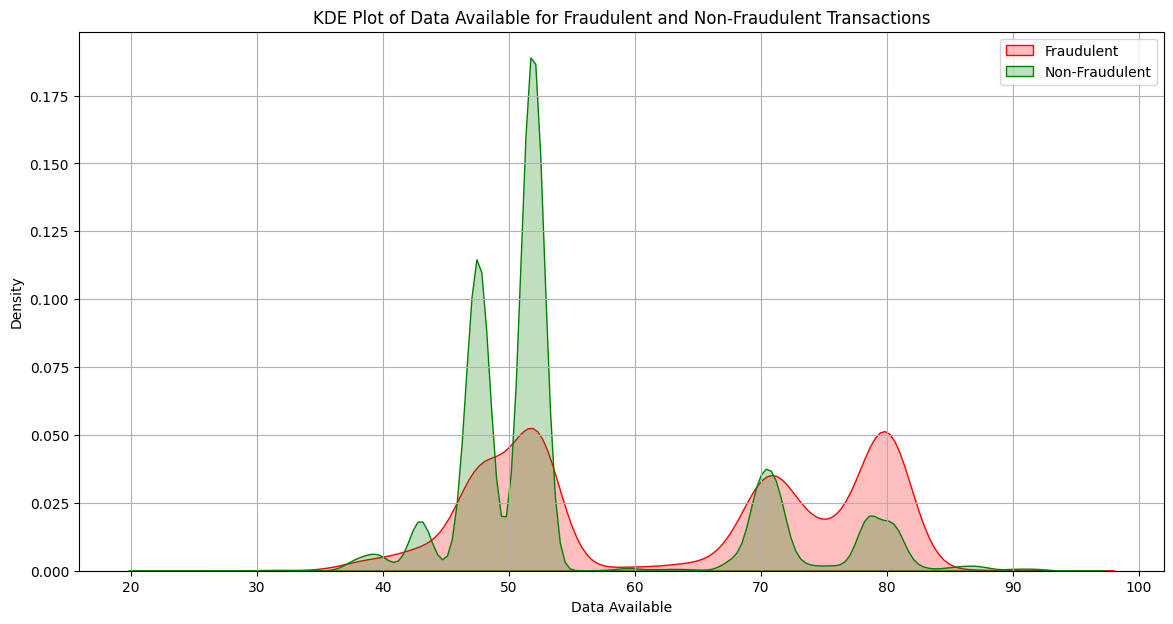

In [64]:
#KDE
plt.figure(figsize=(14, 7))
sns.kdeplot(train[train['isFraud'] == 1]['Data_Available'], shade=True, color='red', label='Fraudulent')
sns.kdeplot(train[train['isFraud'] == 0]['Data_Available'], shade=True, color='green', label='Non-Fraudulent')
plt.xlabel('Data Available')
plt.ylabel('Density')
plt.title('KDE Plot of Data Available for Fraudulent and Non-Fraudulent Transactions')
plt.legend()
plt.grid(True)
plt.show()
